In [1]:
import networkx as nx
import csv

#create an empty graph
G = nx.Graph()

In [2]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], language=row[1], color='#30FBD0')

nx.info(G)

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_5027/2776383855.py:10: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 91 nodes and 0 edges'

In [3]:
#create nodes and edges bewtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        
        G.add_node(row[0], name=row[1], topics=row[2], n_star=row[3], n_fork=row[4], languages=row[5], p_lang=row[6], color='#3C5FDE')
        # Add the edges between the repository and the languages
        #for lang in row[5]:
         #   G.add_edge(row[0], lang)
        
nx.info(G)
print(G.nodes['r_99'])


{'name': 'nimblemachines/muforth', 'topics': [''], 'n_star': '110', 'n_fork': '27', 'languages': ['l_29', 'l_30', 'l_24', 'l_6', 'l_31', 'l_4', 'l_11', 'l_32', 'l_28'], 'p_lang': ['87.57', '4.67', '3.80', '2.85', '0.39', '0.34', '0.17', '0.16', '0.04'], 'color': '#3C5FDE'}


/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_5027/1281929338.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


In [4]:
# create nodes and edges between users and repositories
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color='#F8A643')
        # Add edges between the user and their repositories
        #for repo in row[2]:
         #   G.add_edge(row[0], repo)

nx.info(G)
#print(G.nodes['u_1'])

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_5027/449321393.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1498 nodes and 0 edges'

In [5]:
# Add edges between users and repositories based on the users' list of repositories
for node in list(G.nodes):
    # if it's a user node
    if len(node) >= 1:
        if node[0] == "u":
            # for each repository in the user's list of repositories
            for repo in G.nodes[node]['repos']:
                # add an edge between the user and the repository
                G.add_edge(node, repo)
        if node[0] == "r":
            # for each language in the repository's list of languages
            for lang in G.nodes[node]['languages']:
                # add an edge between the repository and the language
                G.add_edge(node, lang)

nx.info(G)        

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_5027/2841023280.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1499 nodes and 2369 edges'

In [6]:
#draw graph with space between nodes
#nx.draw(G, with_labels=False, node_size=1, node_color="#7FB2FD", edge_color="#e795d1", font_size=8, font_color="#000000")
#plt.show()

In [7]:
# Set the layout of the graph
#pos = nx.kamada_kawai_layout(G)

# Draw the nodes and edges of the graph
#nx.draw(G, pos, node_size=200, node_color="#7FB2FD", edge_color="#FF8CCD", with_labels=True, font_size=8)

# Draw the labels of the repositories at an angle to reduce overlap
#repo_labels = nx.get_node_attributes(G, "name")
#repo_pos = {k: (v[0], v[1]-0.1) for k, v in pos.items() if k in repo_labels}
#nx.draw_networkx_labels(G, repo_pos, labels=repo_labels, font_size=8, font_color="k", alpha=1)

# Draw the labels of the users on top of the nodes
#user_labels = nx.get_node_attributes(G, "name")
#nx.draw_networkx_labels(G, pos, labels=user_labels, font_size=8, font_color="k", alpha=1)

# Show the graph
#plt.show()

In [8]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(G)

# Split the degree centrality for users and repositories
languages_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('l_')}
#repos_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('r_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 5 languages in descending order:")
for node in sorted(languages_degree_centrality, key=languages_degree_centrality.get, reverse=True)[:5]:
    print(node, G.nodes[node]['language'], languages_degree_centrality[node])
    
# Print mean degree centrality for users
print("\nMean degree centrality for languages:", sum(languages_degree_centrality.values())/len(languages_degree_centrality))


Degree centrality of first 5 languages in descending order:
l_0 Ruby 0.48664886515353806
l_1 JavaScript 0.2096128170894526
l_4 Shell 0.0801068090787717
l_8 Python 0.06475300400534045
l_6 C 0.058077436582109475

Mean degree centrality for languages: 0.013930662128258938


{'l_0': Text(-0.1385671550769633, 0.0959029592106065, 'l_0'),
 'l_1': Text(0.03774013728846612, -0.4723830532402187, 'l_1'),
 'l_4': Text(0.5977203312945248, -0.07788400190253797, 'l_4'),
 'l_8': Text(0.5794331841335385, -0.38791029618131956, 'l_8'),
 'l_6': Text(0.629716671031268, 0.17276605488443375, 'l_6')}

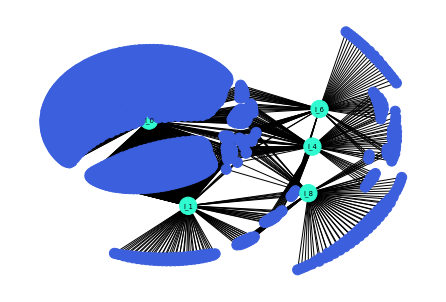

In [9]:
# Draw the graph containing only the top 10 languages with neighbours based on degree centrality
languages_subgraph = nx.Graph()
for node in sorted(languages_degree_centrality, key=languages_degree_centrality.get, reverse=True)[:5]:
    languages_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "l":
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        languages_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(languages_subgraph)
node_sizes = [300 if node.startswith('l_') else 100 for node in languages_subgraph.nodes]
nx.draw(languages_subgraph, pos, node_size=node_sizes, node_color=[languages_subgraph.nodes[node]['color'] for node in languages_subgraph.nodes])
labels = {node: node for node in languages_subgraph.nodes if node.startswith('l_')}
nx.draw_networkx_labels(languages_subgraph, pos, labels, font_size=7)